<a href="https://colab.research.google.com/github/JavierArdans/Data-Science---ACV/blob/main/Para_Revisar_Entrega_ACV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENTENDER LAS SEÑALES**

**Temática elegida**

La temática a abordar es el ACV; Cada año, casi 800 000 personas tienen un accidente cerebrovascular, más de 140 000 mueren y muchos sobrevivientes quedan con discapacidades. Esto es alarmante teniendo en cuenta que cerca del 80 % de los accidentes cerebrovasculares son prevenibles.

En Uruguay mueren unas cinco personas por día a causa del ACV.

La patología tiene un alto costo para el sistema de salud a nivel mundial, consumiendo del 2% al 4% de todos los recursos en salud.

**Definición del objetivo**

A través de los datos de pacientes con ACV, se creará un modelo que permita aprender sobre las condiciones que determinan que una persona padezca un ACV.

# **CONTEXTO COMERCIAL**

El accidente cerebrovascular (ACV) es una de las principales causas de discapacidad y muerte en todo el mundo, y puede tener un impacto significativo en la calidad de vida de las personas que lo sufren. Por esta razón, la prevención del ACV es un tema importante en el contexto comercial de la atención médica y la salud pública.

En términos de atención médica, los profesionales de la salud pueden recomendar cambios en el estilo de vida, como una dieta saludable y ejercicio regular, para reducir el riesgo de ACV.

En el ámbito de la salud pública, la prevención del ACV también puede ser un enfoque importante para las empresas y organizaciones que buscan promover la salud y el bienestar en la comunidad. Estos grupos pueden realizar campañas de concienciación sobre los factores de riesgo del ACV y proporcionar recursos educativos para ayudar a las personas a tomar medidas preventivas. Además, pueden trabajar con los responsables políticos y las autoridades sanitarias para implementar políticas y programas que fomenten estilos de vida más saludables y reduzcan la incidencia del ACV en la población.

En resumen, la prevención del ACV es un tema importante en el contexto comercial de la atención médica y la salud pública. Tanto los proveedores de atención médica como las empresas y organizaciones pueden desempeñar un papel importante en la prevención del ACV mediante la promoción de prácticas saludables y la provisión de productos y servicios que ayuden a reducir el riesgo de ACV.


# **PROBLEMA COMERCIAL**

Desde una perspectiva comercial, el ACV puede plantear varios problemas. En primer lugar, el costo de atención médica asociado con el tratamiento del ACV puede ser significativo, especialmente si se consideran los costos a largo plazo de la rehabilitación y la atención continua necesaria para las personas que sufren discapacidad permanente después del ACV.
La pregunta sería:

- ¿Se puede prevenir?

- ¿Que factores son los que inciden?

- ¿Que podemos hacer para evitarla?


# **CONTEXTO ANALITICO**

**Los Tipos de Datos que tenemos son:**

**id**: Identificador

**gender**: Genero, "Male/Masculino", "Female/Femenino" u "Other/Otro"

**age**: Edad del paciente.

**hypertension**: Hay 2 valores, 0 si el paciente no tiene hipertension, y 1 si lo tiene.

**heart_disease**: Hay 2 valores, 0 si el paciente no tiene enfermedades en el corazón, y 1 si lo tiene.

**ever_married**: Si el paciente está casado o no.

**work_type**: Los tipos de trabajo, "children/niño", "Govt_jov/Trabajo en el gobierno", "Never_worked/Nunca trabajó", "Private/Privado" or "Self-employed/Trabaja por cuenta propia".

**Residence_type**: Tipo de residencia "Rural" or "Urban/Urbana".

**avg_glucose_level**: Nivel de Glucosa en la sangre

**bmi**: Indice de masa corporal.

**smoking_status**: Fumador? "formerly smoked/ Anteriormente fumaba", "never smoked /Nunca fumó", "smokes/Fuma" or "Unknown/Desconocido".

**stroke**: Hay 2 valores, 0 si el paciente no tuvo derrame cerebral, y 1 si lo tuvo/tiene.
-

La variable objetivo es Stroke, ya que indica si el paciente tuvo/tiene ACV.

Por lo que vemos acá en 3 columnas (Hypertension, Heart Disease y Stroke) los valores son 1 o 0, para un mejor manejo de estos datos, lo que vamos a hacer es categorizarlos a objetos.

# **DATA ACQUISITION**

Importamos las librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
sns.set_theme(style="whitegrid", palette="rocket")

Cargamos el dataset elegido:

In [2]:
acv = pd.read_csv ('/content/acv1.csv')

In [3]:
acv.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


Eliminamos la columna 'ID' (modificando el dataset original), ya que no es un dato que nos importe en el estudio.

In [4]:
acv.drop('id', axis=1, inplace=True)

Binarizamos la columna de datos 'stroke' pasandolo a Integer, ya que la vamos a necesitar para estudiar más adelante.

In [5]:
acv['stroke'] = acv['stroke'].astype(int)
acv.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Vemos la informacíon del Data Frame importado, con los tipos de datos que utiliza en sus columnas

In [7]:
acv.describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


Con el método describe obtenemos un resúmen de las columnas del Data Frame, y redondeamos las cifras significativas a 2 decimales, para que sea más fácil interpretar los valores.


In [8]:
acv['hypertension'] = acv['hypertension'].astype('object')
acv['heart_disease'] = acv['heart_disease'].astype('object')
acv['stroke'] = acv['stroke'].astype('object')
#acv['stroke'] = acv['stroke'].astype(bool)

En estas lineas lo que hicimos fue a los campos "Hypertension, heart_disease y stroke, pasarlos al tipo de datos object para poder trabajar con ellos.

# **PREPARAR LOS DATOS (Data Wrangling)**

Comenzamos realizando la preparación de los datos, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.

**Limpiar el Dataset:**

Limpiar celdas vacías

Limpiar mal formato

Revisar si hay valores faltantes (NaN)

Borrar duplicados

In [9]:
sin_valores = (acv[['hypertension','heart_disease','avg_glucose_level','bmi','stroke']] == np.nan).sum()
print(sin_valores)

hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64


Observamos que en el DataSet no existen celdas NULL

In [10]:
mapping = {True: 1, False: 0}
acv['stroke?'] = acv['stroke'].map(mapping)
acv.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke?
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,NaN
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,NaN
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,NaN
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,NaN
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0,NaN


Creamos un diccionario para asignar valores numéricos a los valores booleanos.

Usamos la función map() para aplicar el diccionario a la columna.


Text(0.5, 1.0, 'Matris de valores nulos o vacíos')

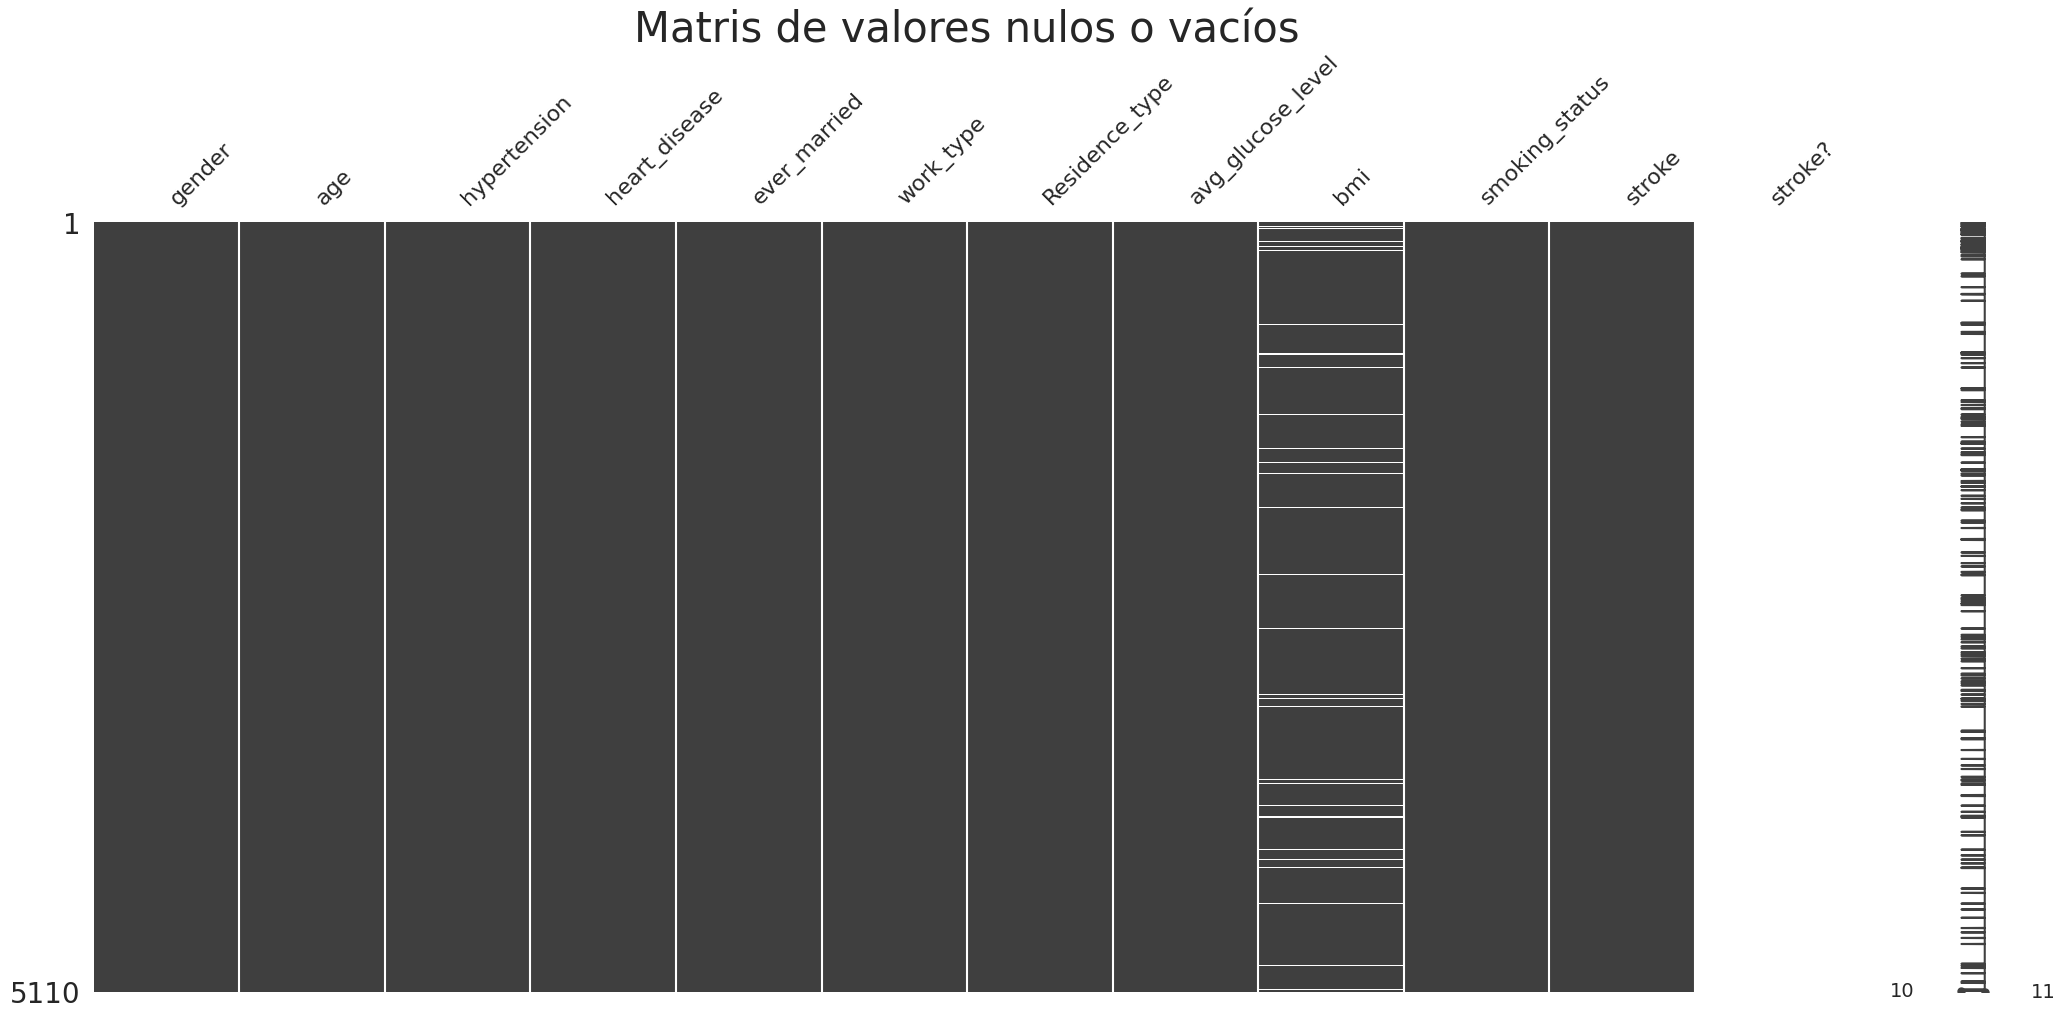

In [11]:
msno.matrix(acv)
plt.title("Matris de valores nulos o vacíos",fontsize=30)

**Indexamiento de datos:**


Podemos observar que existen datos nulos en la columna "BMI".

Dichos datos refieren al índice de masa corporal.


Otro factor importante, es saber cual es la edad donde se presenta el problema planteado, por eso necesitamos saber cual es la edad donde se presenta el problema.

In [12]:
acv.groupby(['age','stroke'])

In [13]:
acv.groupby(['age','stroke'])['age'].count()

age    stroke
0.08   0          2
0.16   0          3
0.24   0          5
0.32   0          5
0.40   0          2
                 ..
80.00  1         17
81.00  0         46
       1         14
82.00  0         47
       1          9
Name: age, Length: 148, dtype: int64

In [14]:
acv['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Vemos que el 95% del registro, son pacientes que no han tenido derrames cerebrales, y el 5% si.

In [15]:
stroke = acv['stroke'] == 1
stroke.head()

0    True
1    True
2    True
3    True
4    True
Name: stroke, dtype: bool

# **EDA - Exploratory Data Analysis**

1 Realizar exámen Gráfico y breve análisis estadístico.

2 Analizar Correlaciones.

3 Evaluar supuestos distribuicionales

4 Identificar posibles casos atipicos

5 Comprender los datos ausentes

Crearemos un indice, para segmentar las personas mayores e igual de 55 años, ya que son la franja que corren mayor riesgo de sufrir un accidente cerebrovascular

In [16]:
acv55 = acv.query("age > 55")

In [17]:
stroke55 = acv.query("age > 55 and stroke < 1")

Text(0.5, 1.0, 'Boxplot')

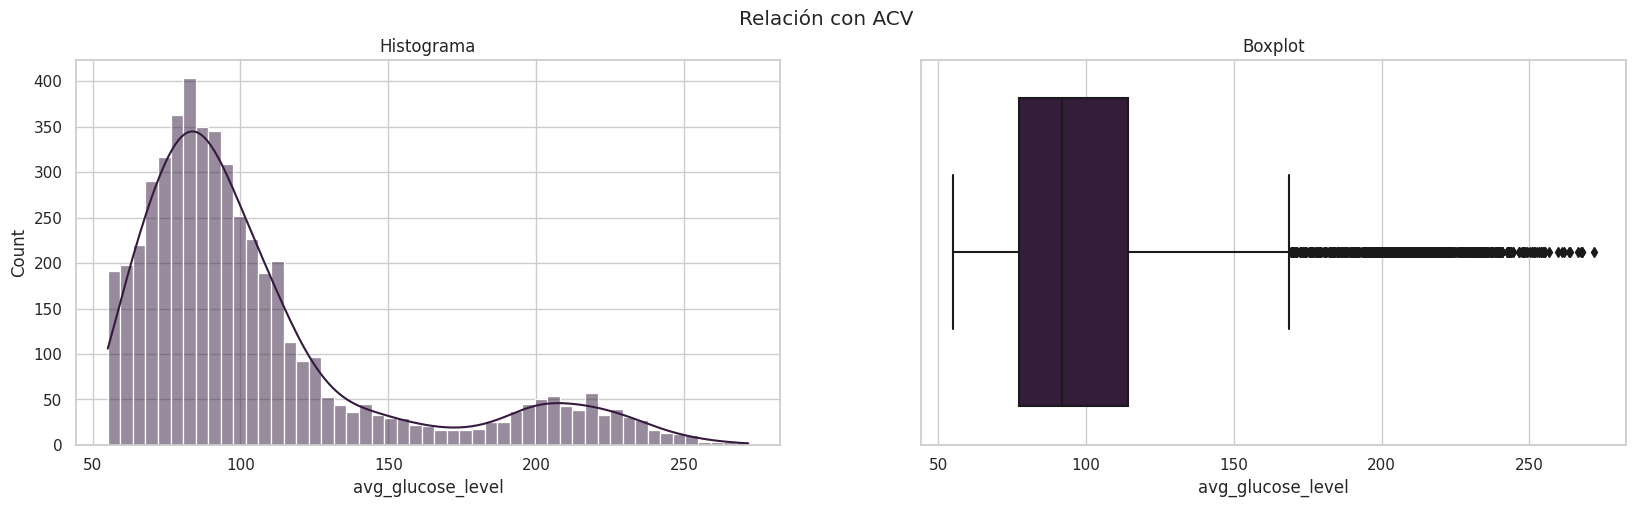

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Relación con ACV')

# Histograma
sns.histplot(ax=axes[0], x = acv['avg_glucose_level'], kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x = acv['avg_glucose_level'])
axes[1].set_title("Boxplot")

Se logra distinguir que de los entrevistados los niveles de Gluvosa son de la mayoría de un bajo nivel.

In [19]:
agrupado_acv = acv[(acv['stroke'] == 1) & (acv['age'].between(40, 80))]

Creamos un grupo de personas que tuvieron ACV, y sus edades son mayores a los 40 años.

# **CORRELACIONES Y DEPENDENCIAS**

<ipython-input-20-3dd2ba2c5bf1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(acv.corr(),2),annot=True)


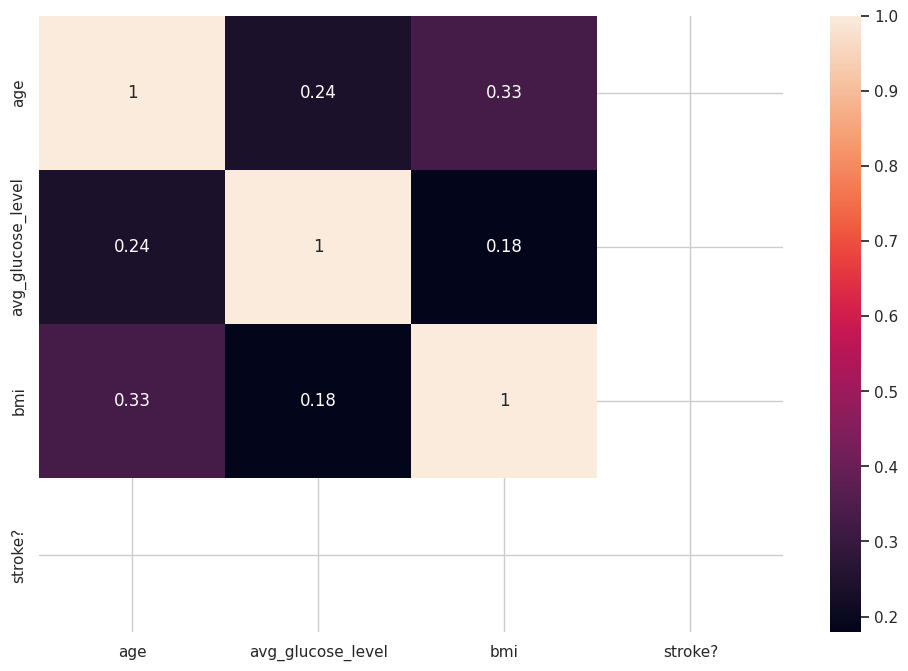

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(np.round(acv.corr(),2),annot=True)
plt.show()

Lo que vemos acá es la correlación y dependencia, entre las variables, donde se ve el valor más alto en la intersección entre EDAD y BMI (Indice de masa corporal), en 2do nivel, se ve a la edad conjuntamente al nivel de glucosa, y por ultimo el nivel de glucosa con el BMI.


Elección de método de Feature Selection

# **INTRO A STORYTELLING**

In [21]:
# Para la siguiente entrega, lo que voy a hacer es generar un nuevo dataset, a modo de que no quede tan cargado la parte del storytelling con los pasos previos

acv.to_csv('ACV-Storytelling.csv', index=False)

Imagina que estás sentado en tu oficina, trabajando en tu computadora. De repente, comienzas a sentir un dolor intenso en la cabeza y tu brazo izquierdo se entumece. Tratas de moverlo, pero no responde. Tu habla se vuelve incoherente y te das cuenta de que algo está muy mal.

Lo que estás experimentando es un ACV. Los ACV son causados ​​por la interrupción del suministro de sangre al cerebro, y pueden ser fatales o dejar discapacidades graves. Son la segunda causa principal de muerte a nivel mundial y pueden afectar a cualquier persona, en cualquier momento.

**Pero hay buenas noticias:** la mayoría de los ACV se pueden prevenir con algunos cambios en tu estilo de vida. Aquí hay algunas cosas que puedes hacer para reducir tu riesgo de tener un ACV:

**Controla tu presión arterial:** La hipertensión es uno de los principales factores de riesgo para el ACV. Asegúrate de hacer chequeos regulares y tomar medicamentos según lo recetado por tu médico.

**Deja de fumar:** Fumar daña tus arterias y aumenta tu riesgo de tener un ACV. Si eres fumador, considera dejarlo lo antes posible.

**Mantén una dieta saludable:** Consumir una dieta rica en frutas, verduras, granos enteros, proteínas magras y grasas saludables puede ayudar a reducir tu riesgo de ACV. Limita la ingesta de alimentos procesados, grasas saturadas y azúcares refinados.

**Haz ejercicio regularmente:** La actividad física regular puede ayudar a reducir tu riesgo de ACV. Trata de hacer al menos 150 minutos de ejercicio moderado a la semana.

**Controla tu peso:** El sobrepeso y la obesidad aumentan tu riesgo de ACV. Si tienes sobrepeso, trata de perder peso gradualmente a través de una combinación de ejercicio y cambios en la dieta.

**Recuerda, la prevención es la clave para evitar un ACV. Haz algunos cambios en tu estilo de vida hoy para proteger tu salud y bienestar a largo plazo.**

# **MACHINE LEARNING**

In [22]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [24]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

Usaremos la Regresion Logística ya que se utiliza para determinar si una o múltiples variables independientes tienen un efecto sobre una variable dependiente binaria.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = acv.drop('stroke', axis=1)
y=acv[['stroke']]

In [26]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [27]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
 11  stroke?            0 non-null      float64
dtypes: float64(4), object(8)
memory usage: 479.2+ KB


In [28]:
acv = acv.drop('stroke', axis=1)

In [29]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke?            0 non-null      float64
dtypes: float64(4), object(7)
memory usage: 439.3+ KB


In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# Especifica las columnas categóricas que deseas codificar
categorical_columns = ['ever_married']

# Especifica las columnas categóricas que deseas codificar
categorical_columns = ['gender']

# Crea el transformador para aplicar la codificación one-hot
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical_columns)],
                      remainder='passthrough')

#OneHotEncoder
acv_encoded = pd.get_dummies(acv, columns=['gender'])
acv_encoded = pd.get_dummies(acv, columns=['ever_married'])


Se generan los conjuntos para entrenamiento y prueba (train-test split)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
# Aplica la transformación a tus datos de entrenamiento
X_train_encoded = ct.fit_transform(X_train)


VERIFICACION PASO A PASO PARA AJUSTAR EL MODELO

Igualdad de líneas - Dimensiones coincidentes

In [33]:
X_train.shape[0]

3577

In [34]:
y_train.shape[0]

3577

Correspondencia de muestras:

Variables numéricas:

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 1921 to 2732
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3577 non-null   object 
 1   age                3577 non-null   float64
 2   hypertension       3577 non-null   object 
 3   heart_disease      3577 non-null   object 
 4   ever_married       3577 non-null   object 
 5   work_type          3577 non-null   object 
 6   Residence_type     3577 non-null   object 
 7   avg_glucose_level  3577 non-null   float64
 8   bmi                3433 non-null   float64
 9   smoking_status     3577 non-null   object 
 10  stroke?            0 non-null      float64
dtypes: float64(4), object(7)
memory usage: 335.3+ KB


In [36]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 1921 to 2732
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stroke  3577 non-null   object
dtypes: object(1)
memory usage: 55.9+ KB


Valores válidos:

In [37]:
# Verificar valores nulos en X_train
nulos = X_train.isnull().any()

# Imprimir columnas con valores nulos
columnas_con_nulos = nulos[nulos].index
print("Columnas con valores nulos en X_train:")
print(columnas_con_nulos)

Columnas con valores nulos en X_train:
Index(['bmi', 'stroke?'], dtype='object')


In [38]:
# Verificar valores nulos en X_train
nulos = y_train.isnull().any()

# Imprimir columnas con valores nulos
columnas_con_nulos = nulos[nulos].index
print("Columnas con valores nulos en y_train:")
print(columnas_con_nulos)

Columnas con valores nulos en y_train:
Index([], dtype='object')


In [39]:
X_train_sin_nulos = X_train.dropna()
print(X_train_sin_nulos)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke?]
Index: []


In [40]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke?            0 non-null      float64
dtypes: float64(4), object(7)
memory usage: 439.3+ KB


In [41]:
#Dropearemos la columna duplicada de 'Stroke' ya que la pasamos al tipo int64
acv = acv.drop('stroke?', axis=1)


In [42]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), object(7)
memory usage: 399.3+ KB


In [43]:
#ELIMINAREMOS LOS ESPACIOS VACIOS DEL DS
acv_dropna = acv.dropna()

In [46]:
from sklearn.preprocessing import LabelEncoder

# Crea una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Codifica las etiquetas
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [51]:
# Convierte la matriz de características codificada en un DataFrame
encoded_acv = pd.DataFrame(X_encoded.toarray())

# Muestra las primeras filas del DataFrame
print(encoded_acv.head())

   0     1     2     3     4     5     6     7     8     9     ...  4513  \
0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   4514  4515  4516  4517  4518  4519  4520  4521  4522  
0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  
1   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   1.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0  

[5 rows x 4523 columns]


In [53]:
# Aplicar One-Hot Encoding a la matriz de características X
onehot_encoder = OneHotEncoder()
X_encoded = onehot_encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y)

# Muestra las primeras filas del DataFrame
print(encoded_acv.head())

   0     1     2     3     4     5     6     7     8     9     ...  4513  \
0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   4514  4515  4516  4517  4518  4519  4520  4521  4522  
0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  
1   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   1.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0  

[5 rows x 4523 columns]


In [54]:
model = LogisticRegression(max_iter=10000, n_jobs=-1)
model.fit(X_train, y_train)


# Ajustar modelo
model.fit(X_train, y_train)

#Predicciones
#predicciones = model.predict(X_test)
#predicciones

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [ ]:
print(accuracy_score(y_test, predicciones))

In [ ]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

## Probando nuevos tecnicas de Clasificación:




In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Separacion train/tet
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(max_iter=10000, n_jobs=-1)

# Exactitud (Accuracy)
print(accuracy_score(y_test, predicciones))

# Precisión (Precision)
precision = precision_score(y_test, predicciones)

# Recall
recall = recall_score(y_test, predicciones)

# F-score
fscore = f1_score(y_test, predicciones)

Precision Score

In [ ]:
print(precision_score(y_test, predicciones))

Recall Score

In [ ]:
print(recall_score(y_test, predicciones))

F-Score

In [ ]:
print(f1_score(y_test, predicciones))

In [ ]:
acv.info

Revisamos que no hayan datos NaN en el dataset

In [ ]:
print(acv.isna().sum())

In [ ]:
pip install pandas-profiling


In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(acv)
prof.to_file(output_file='ACV.html')

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# separar las características y la variable objetivo
X = acv.drop('bmi', axis=1)  # características,acá que me gustaría poder usar más de una variable
y = acv['stroke?']  # variable objetivo

# codificar las características categóricas utilizando one-hot
X = pd.get_dummies(X, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# entrenar un modelo de árbol de decisión
acv.dropna(subset=['bmi'], inplace=True)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)
print('Coeficiente de determinación (R2):', r2)

R2 = 1.0

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

MAE = 0.0

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

MSE = 1.0

# **FEATURE ENGINEERING**

In [ ]:
#Tratamiento de valores faltantes:
acv.isnull

In [ ]:
acv.info

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Aplicar Label Encoding a la variable 'gender'
label_encoder = LabelEncoder()
acv['gender_encoded'] = label_encoder.fit_transform(acv['gender'])

# Aplicar Label Encoding a la variable 'smoking_status'
acv['smoking_status_encoded'] = label_encoder.fit_transform(acv['smoking_status'])

In [ ]:
# Cargamos como quedó el Encoder
print(acv[['gender', 'gender_encoded', 'smoking_status', 'smoking_status_encoded']].head())

# Comparamos como quedaron los resultados después del Labeling Encoder, para ver que no haya perdidad de datos

In [ ]:
print(acv['gender'].value_counts())
print(acv['smoking_status'].value_counts())

In [ ]:
print(acv['gender_encoded'].value_counts())
print(acv['smoking_status_encoded'].value_counts())

In [ ]:
acv['gender_encoded'].value_counts().plot(kind='bar')
plt.xlabel('Gender Codificado')
plt.ylabel('Cantidades')
plt.title('Distribución de Genero Codificado')
plt.show()

In [ ]:
acv['smoking_status_encoded'].value_counts().plot(kind='bar')
plt.xlabel('Status de fumadores Codificado')
plt.ylabel('Cantidades')
plt.title('Distribución Status de fumadores Codificado')
plt.show()